# importing

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import datetime

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, grangercausalitytests

sns.set(style="darkgrid")

In [2]:
global_temp_df = pd.read_csv('data/global_temp_df.csv')

In [3]:
co2_concentration_df = pd.read_csv('data/co2_concentration_df.csv')

In [4]:
global_temp_df.tail(13)

,dt,LandAndOceanAverageTemperature
1979,2014-12-01,14.410
1980,2015-01-01,14.255
1981,2015-02-01,14.564
1982,2015-03-01,15.193
1983,2015-04-01,15.962
1984,2015-05-01,16.774
1985,2015-06-01,17.390
1986,2015-07-01,17.611
1987,2015-08-01,17.589
1988,2015-09-01,17.049


In [5]:
global_temp_df['dt'] = global_temp_df['dt'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))

In [6]:
global_temp_df['dt'] = global_temp_df['dt'].apply(lambda x: x.replace(day=15))

In [7]:
global_temp_df.tail(13)

,dt,LandAndOceanAverageTemperature
1979,2014-12-15,14.410
1980,2015-01-15,14.255
1981,2015-02-15,14.564
1982,2015-03-15,15.193
1983,2015-04-15,15.962
1984,2015-05-15,16.774
1985,2015-06-15,17.390
1986,2015-07-15,17.611
1987,2015-08-15,17.589
1988,2015-09-15,17.049


In [8]:
co2_concentration_df.head(13)

,datetime,data_mean_global
0,1677-10-15,275.003582
1,1677-11-15,276.008147
2,1677-12-15,276.645443
3,1678-01-15,277.105917
4,1678-02-15,277.488981
5,1678-03-15,277.830969
6,1678-04-15,278.071671
7,1678-05-15,278.016089
8,1678-06-15,277.284444
9,1678-07-15,275.645628


In [9]:
co2_concentration_df['datetime'] = co2_concentration_df['datetime'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
co2_concentration_df.set_index('datetime', inplace=True)

global_temp_df.set_index('dt', inplace=True)

In [11]:
global_temp_df.index.name = 'datetime'

In [12]:
global_temp_df

,LandAndOceanAverageTemperature
datetime,
1850-01-15,12.833
1850-02-15,13.588
1850-03-15,14.043
1850-04-15,14.667
1850-05-15,15.507
...,...
2015-08-15,17.589
2015-09-15,17.049
2015-10-15,16.290


In [13]:
co2_concentration_df

,data_mean_global
datetime,
1677-10-15,275.003582
1677-11-15,276.008147
1677-12-15,276.645443
1678-01-15,277.105917
1678-02-15,277.488981
...,...
2014-08-15,394.573461
2014-09-15,395.026810
2014-10-15,396.668760


In [14]:
year_1900 = datetime.datetime.strptime('1900-01-01', '%Y-%m-%d')

In [15]:
co2_temp = pd.merge(global_temp_df, co2_concentration_df, left_on='datetime', right_on='datetime')

In [16]:
co2_temp

,LandAndOceanAverageTemperature,data_mean_global
datetime,,
1850-01-15,12.833,284.944656
1850-02-15,13.588,285.333792
1850-03-15,14.043,285.682825
1850-04-15,14.667,285.931179
1850-05-15,15.507,285.885928
...,...,...
2014-08-15,17.607,394.573461
2014-09-15,16.975,395.026810
2014-10-15,16.029,396.668760


In [17]:
co2_temp.describe()

,LandAndOceanAverageTemperature,data_mean_global
count,1980.000000,1980.000000
mean,15.207438,315.966261
std,1.272947,29.578805
min,12.475000,281.901051
25%,14.043750,292.672647
50%,15.248500,307.565362
75%,16.395000,329.140279
max,17.609000,399.179692


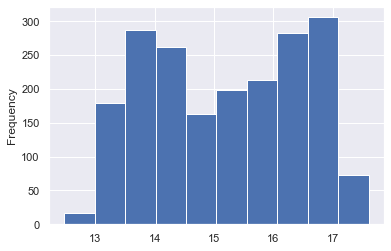

In [18]:
co2_temp['LandAndOceanAverageTemperature'].plot.hist()

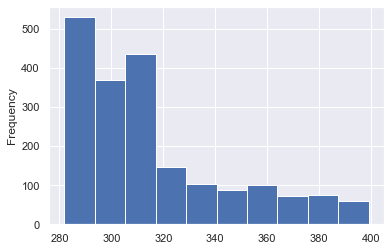

In [19]:
co2_temp['data_mean_global'].plot.hist()

In [20]:
corrSeries = co2_temp['data_mean_global'].rolling(window=32).corr(co2_temp['LandAndOceanAverageTemperature'])

In [21]:
corrSeries.describe()

count    1949.000000
mean       -0.458905
std         0.078051
min        -0.682973
25%        -0.512988
50%        -0.460974
75%        -0.412265
max        -0.157244
dtype: float64

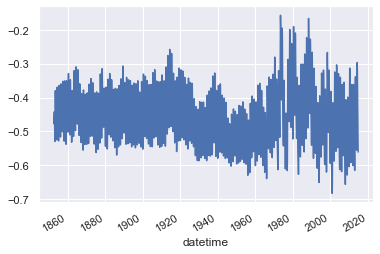

In [22]:
corrSeries.plot()

In [23]:
co2_temp['data_mean_global'].corr(co2_temp['LandAndOceanAverageTemperature'])

0.18467125422742856

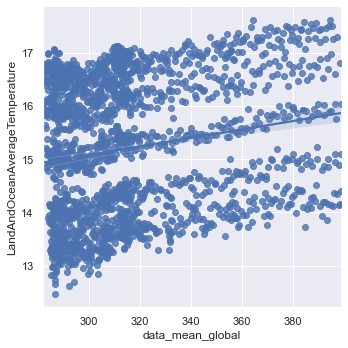

In [24]:
sns.lmplot(y='LandAndOceanAverageTemperature', x='data_mean_global', data =co2_temp)

In [25]:
co2_temp.columns = ['Global Temperature (ºC)', 'CO2 concentration']

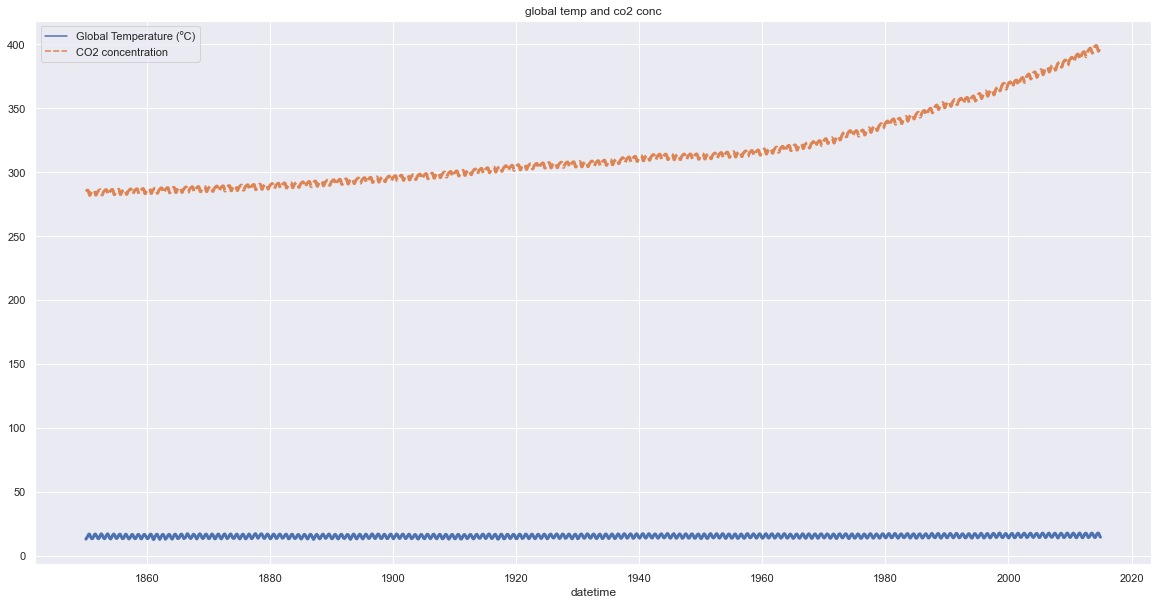

In [26]:
plt.subplots(figsize=(20,10))

plt.title('global temp and co2 conc')

ax = sns.lineplot(data=co2_temp,ci=40, lw=3)

#ax.set(xlabel='Year', ylabel='Land Average Temperature (ºC)')

#plt.savefig('co2_temp.pdf')

plt.show()

# spread stationarity: cointegration (when the spread are stationary)

In [27]:
co2_temp['spread'] = co2_temp['Global Temperature (ºC)'] - co2_temp['CO2 concentration']

In [28]:
stationary_test_result = adfuller(co2_temp['spread'].diff(1).dropna())
print('p-value: ' + str(stationary_test_result[1]))

p-value: 0.05036721185742156


#### -> the time series are almost stationary (their difference is almost stationary over time)

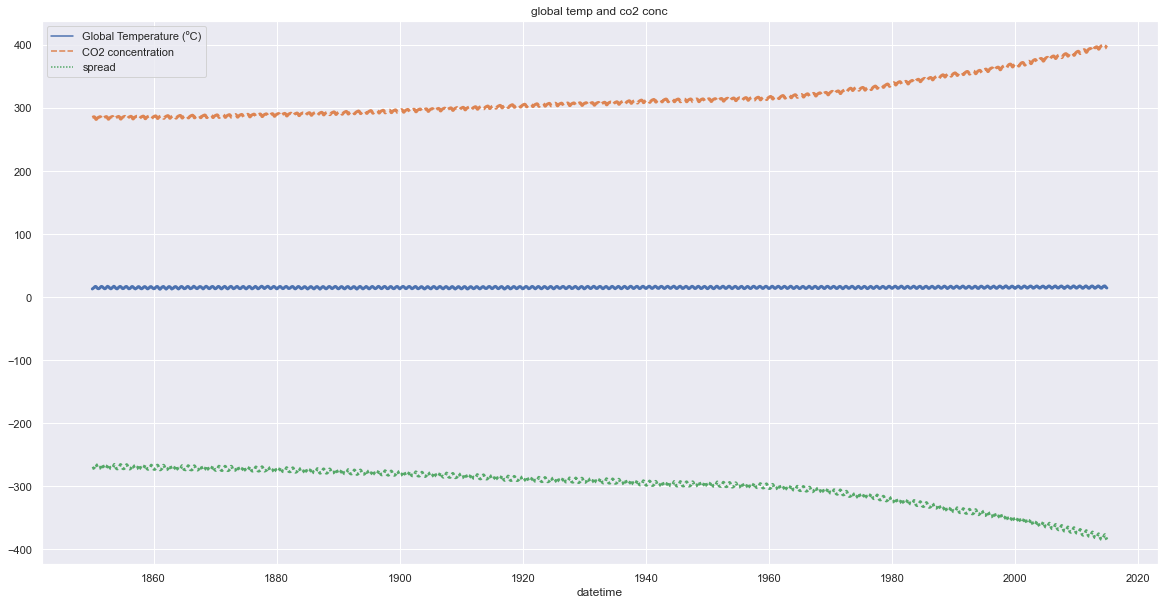

In [29]:
plt.subplots(figsize=(20,10))

plt.title('global temp and co2 conc')

ax = sns.lineplot(data=co2_temp,ci=40, lw=3)

#ax.set(xlabel='Year', ylabel='Land Average Temperature (ºC)')

#plt.savefig('co2_temp.pdf')

plt.show()

# causality: Granger Causality

null hypothesis: the series in the second column does not Granger cause the series in the first

In [30]:
co2_temp.drop(columns='spread', inplace=True)

In [31]:
co2_temp['Global Temperature (ºC)'] = co2_temp['Global Temperature (ºC)'].pct_change()
co2_temp['CO2 concentration'] = co2_temp['CO2 concentration'].pct_change()
co2_temp.dropna(inplace=True)

In [32]:
co2_temp

,Global Temperature (ºC),CO2 concentration
datetime,,
1850-02-15,0.058833,0.001366
1850-03-15,0.033485,0.001223
1850-04-15,0.044435,0.000869
1850-05-15,0.057271,-0.000158
1850-06-15,0.054556,-0.002517
...,...,...
2014-08-15,0.005655,-0.002718
2014-09-15,-0.035895,0.001149
2014-10-15,-0.055729,0.004157


In [33]:
grangercausalitytests(co2_temp[['Global Temperature (ºC)', 'CO2 concentration']], maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=698.7041, p=0.0000  , df_denom=1975, df_num=1
ssr based chi2 test:   chi2=699.7654, p=0.0000  , df=1
likelihood ratio test: chi2=599.1291, p=0.0000  , df=1
parameter F test:         F=698.7041, p=0.0000  , df_denom=1975, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=406.1994, p=0.0000  , df_denom=1972, df_num=2
ssr based chi2 test:   chi2=814.4587, p=0.0000  , df=2
likelihood ratio test: chi2=682.0329, p=0.0000  , df=2
parameter F test:         F=406.1994, p=0.0000  , df_denom=1972, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=375.4129, p=0.0000  , df_denom=1969, df_num=3
ssr based chi2 test:   chi2=1130.2426, p=0.0000  , df=3
likelihood ratio test: chi2=893.8223, p=0.0000  , df=3
parameter F test:         F=375.4129, p=0.0000  , df_denom=1969, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=294.3689, p=0

{1: ({'ssr_ftest': (698.704069395517, 4.395251190857927e-132, 1975.0, 1),
   'ssr_chi2test': (699.7653920325735, 3.362956202359369e-154, 1),
   'lrtest': (599.1290882338126, 2.5895809925609904e-132, 1),
   'params_ftest': (698.7040693955179, 4.395251190856678e-132, 1975.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (406.1994321783038, 1.875021148150274e-148, 1972.0, 2),
   'ssr_chi2test': (814.458699205382, 1.3884831013501738e-177, 2),
   'lrtest': (682.0328663808559, 7.914888971943991e-149, 2),
   'params_ftest': (406.1994321783036, 1.8750211481505937e-148, 1972.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (375.4129157887893, 8.444902950188256e-193, 1969.0, 3),
   'ssr_chi2test': (1130.2426433702096, 9.996271255246226e-245, 3),
   'lrtest': (893.8223445687308, 1.9363983902074152e-193, 3),
   'params_ftest': (375.41291578879054, 8.4449029501781745e-193, 1969.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0

## all p-values are 0 -> 0 chance of rejecting the null hypothesis that co2 concentration does not cause global temperature

## CO2 concenctration DOES imply global temperature